In [92]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from graphviz import Source
from IPython.display import Image

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_curve,f1_score, auc
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import balanced_accuracy_score



sns.set_style("whitegrid")

In [34]:
data = pd.read_csv("loan_data.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 43386 rows and 27 columns.
- Column names:  ['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT', 'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y', 'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON', 'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX', 'PAY_METHOD_B', 'PAY_METHOD_C', 'PAY_METHOD_D', 'JOB_B', 'JOB_C', 'JOB_D', 'TARGET']


In [35]:
data.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,LATE_TEL,COMB_COMM,SEX,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_B,JOB_C,JOB_D,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,120,0,1,0,0,0,0,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,0,1,0,1,0,1,0,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,0,1,0,1,0,1,0,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,0,1,1,0,0,0,1,0,0
4,40,36,36,36,0,3,1,0,0,2,...,0,1,0,1,0,0,1,0,0,0


In [36]:
data['TARGET']
np.unique(data['TARGET'], return_counts = True)

(array([0, 1], dtype=int64), array([39254,  4132], dtype=int64))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

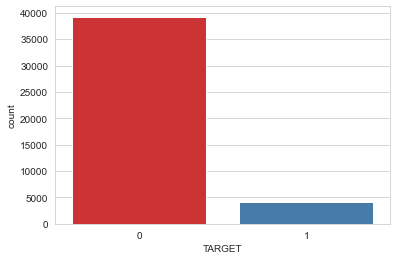

In [37]:
sns.countplot(data['TARGET'], palette='Set1')

In [38]:
X = data.drop(['TARGET'], axis = 1)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, stratify=Y, random_state = 0)

In [39]:
np.unique(Y_train, return_counts = True)

(array([0, 1], dtype=int64), array([35328,  3719], dtype=int64))

In [40]:
y_train.shape

(39047,)

In [81]:
clf_dt = DecisionTreeClassifier(max_depth=5)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [82]:
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)

In [ ]:
y_test_pred2 = (clf_dt.predict_proba(X_test)[:,1]>=0.3).astype(bool)
print(clf_dt.predict_proba(X_test))

In [83]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[34770   558]
 [ 2792   927]]
[[3867   59]
 [ 310  103]]


In [90]:
y_train_pred = clf_dt.predict(X_train)
# y_valid_pred = clf_dt.predict(X_valid)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred, pos_label=1)))
#print('- F1 score (Validation) : {:.4}'.format(f1_score(y_test, y_test_pred, pos_label=1))

# Show train & validation Precision scores
print('- precision score (Train)      : {:.4}'.format(precision_score(y_train, y_train_pred, pos_label=1)))
#print('- precision score (Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred, pos_label=1)))

# Show train & validation recall scores
print('- recall score (Train)      : {:.4}'.format(recall_score(y_train, y_train_pred, pos_label=1)))
print('- recall score (Train)      : {:.4}'.format(recall_score(y_test, y_test_pred2, pos_label=1)))
#print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred, pos_label=1)))

print('- balanced accuracy scroe(Train)    : {:.4}'.format(balanced_accuracy_score(y_train, y_train_pred)))

- Accuracy (Train)      : 0.9142
- Accuracy (Test) : 0.915
- F1 score (Train)      : 0.3563
- precision score (Train)      : 0.6242
- recall score (Train)      : 0.2493
- recall score (Train)      : 0.4697
- balanced accuracy scroe(Train)    : 0.6167


In [85]:
y_score_train =clf_dt.predict_proba(X_train)
y_score_test =clf_dt.predict_proba(X_test)

In [86]:
y_test_pred2 = (clf_dt.predict_proba(X_test)[:,1]>=0.3).astype(bool)
print(clf_dt.predict_proba(X_test))

[[0.68023256 0.31976744]
 [0.99307857 0.00692143]
 [0.96395131 0.03604869]
 ...
 [0.96395131 0.03604869]
 [0.94449392 0.05550608]
 [0.56835307 0.43164693]]


In [89]:
# np.unique(clf_dt.predict_proba(X_test).reshape(-1).return_counts=True)

In [88]:
# Show ROC AUC
fpr, tpr, thresholds =  roc_curve(y_test, y_score_test[:,1], pos_label=1)
print(auc(fpr, tpr))

0.8540508486911002
